In [ ]:
# this i a data exploration @ may 30 2017
# @yvan

In [ ]:
# ok so all my models failed and sukced pretty hard
# i probably should have done an eda (exploratory data analysis)
# earlier, but i actually think its ok to throw your data a few
# simple models, anyways now we're going to explore our data

In [46]:
import os
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

CUR_DIR = os.getcwd()
DATA_DIR = os.path.join('/scratch', 'yns207', 'data_invasive')
print(CUR_DIR, DATA_DIR)

%matplotlib inline

/scratch/yns207/data_invasive /scratch/yns207/data_invasive


In [2]:
%ls $DATA_DIR

results/                   test/    train.7z              valid/
sample_submission.csv      test.7z  train_labels.csv
sample_submission.csv.zip  train/   train_labels.csv.zip


In [4]:
labels_df = pd.read_csv(os.path.join(DATA_DIR, 'train_labels.csv'))
labels_df.head()

name  invasive
0     1         0
1     2         0
2     3         1
3     4         0
4     5         1

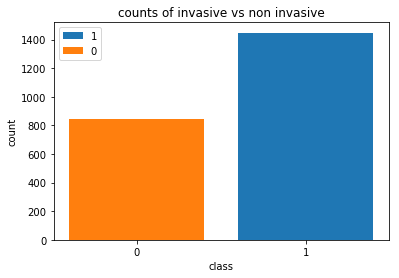

In [28]:
#show counts of invasive vs non invasive
#0 is non invasive, 1 is invasive
inv_counts = labels_df['invasive'].value_counts()
plt.bar(1, inv_counts[1])
plt.bar(0, inv_counts[0])
plt.xlabel('class')
plt.xticks([0,1])
plt.ylabel('count')
plt.title('counts of invasive vs non invasive')
plt.legend(['1', '0'], loc='upper left')
plt.show()

In [34]:
%cd $DATA_DIR
tr_img_names_0 = glob('train/0/*.jpg')
tr_img_names_1= glob('train/1/*.jpg')
tr_img_names_0[:5]

/scratch/yns207/data_invasive


['train/0/1827.jpg',
 'train/0/2184.jpg',
 'train/0/1937.jpg',
 'train/0/193.jpg',
 'train/0/562.jpg']

/scratch/yns207/data_invasive


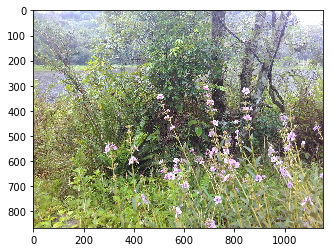

In [74]:
%cd $DATA_DIR
img = mpimg.imread(tr_img_names_0[45])
plt.imshow(img)
plt.show()

/scratch/yns207/data_invasive


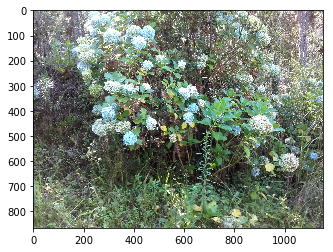

In [73]:
%cd $DATA_DIR
img = mpimg.imread(tr_img_names_1[45])
plt.imshow(img)
plt.show()

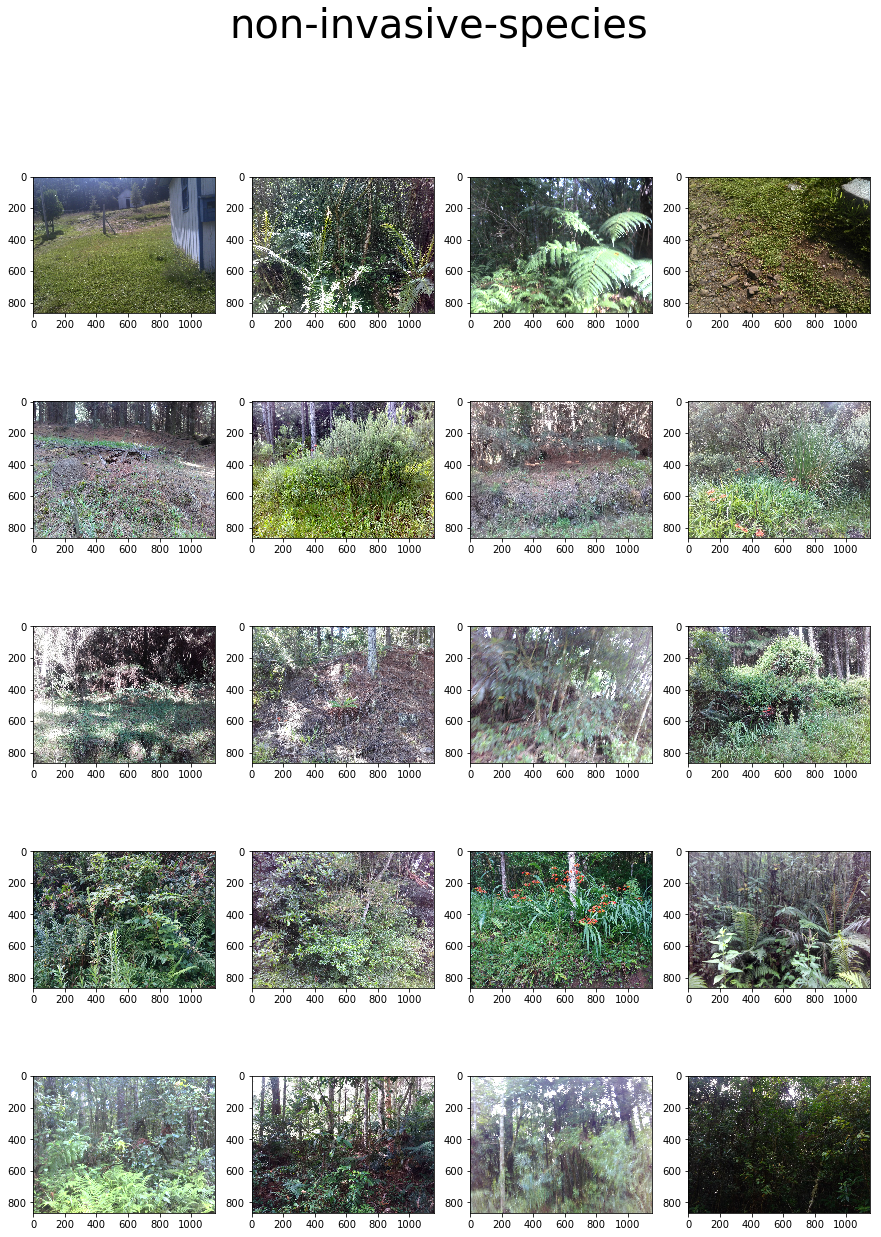

In [66]:
fig, axs = plt.subplots(5, 4, figsize=(15, 20))
axs = axs.ravel()
for i in range(20):
    img = mpimg.imread(tr_img_names_0[i])
    axs[i].imshow(img)
fig.suptitle('non-invasive-species', fontsize=40)
plt.show()

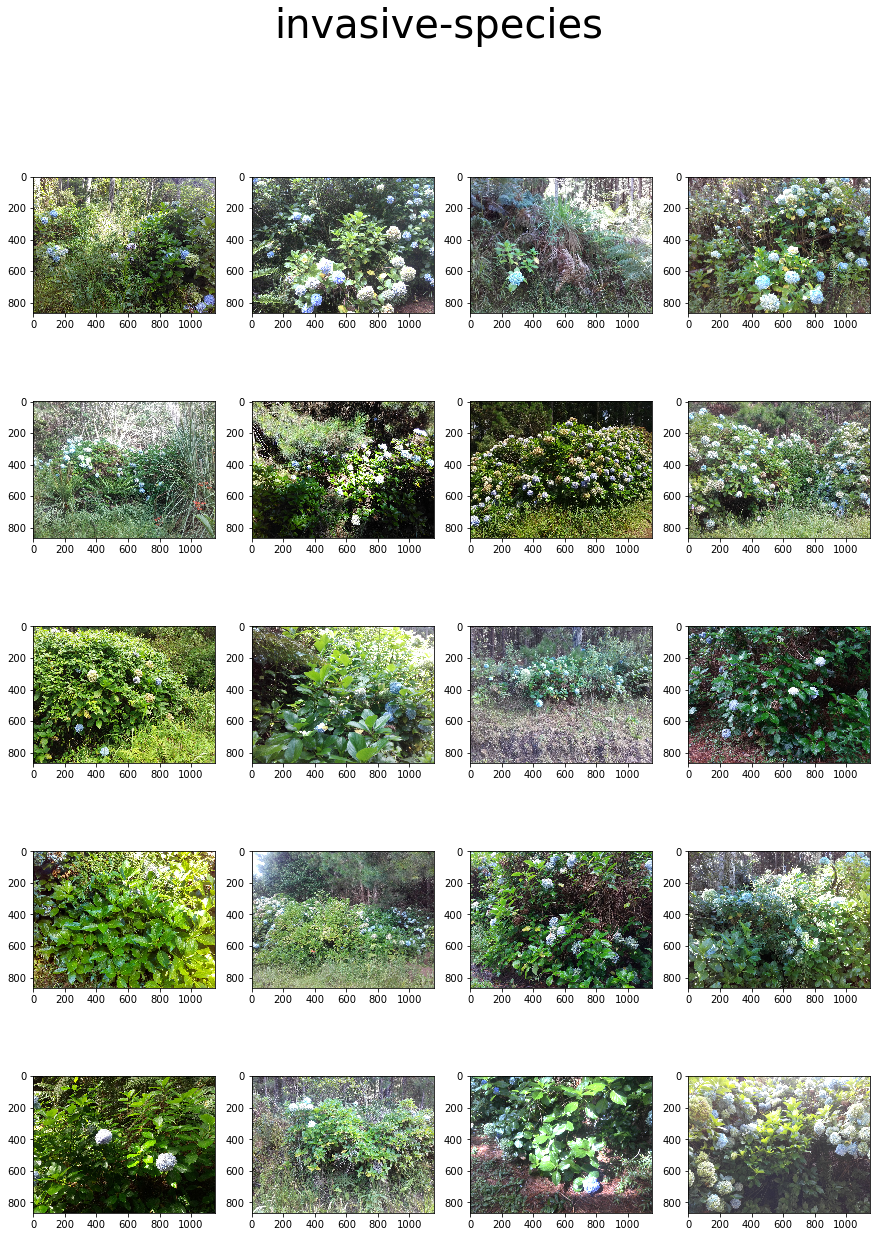

In [67]:
fig, axs = plt.subplots(5, 4, figsize=(15, 20))
axs = axs.ravel()
for i in range(20):
    img = mpimg.imread(tr_img_names_1[i])
    axs[i].imshow(img)
fig.suptitle('invasive-species', fontsize=40)
plt.show()

In [ ]:
# subtract mean pixel values for non invasives from everything (invasive/noninvasive)

# magic wand style searcher that looks for pixel values of same caliber to search for reatures, 
# the idea being that features cluster in pixel value

# check actual image dimensions are they 150 by 200?